In [26]:
import pandas as pd

dataset = pd.read_csv('Reviews.csv', header = None)
data = pd.DataFrame(dataset)
data = data.dropna()
print(data)

                                                       0
0      I order 3 of them and one of the item is bad q...
1      Bulk is always the less expensive way to go fo...
2      Well they are not Duracell but for the price i...
3      Seem to work as well as name brand batteries a...
4      These batteries are very long lasting the pric...
...                                                  ...
28327  I got 2 of these for my 8 yr old twins. My 11 ...
28328  I bought this for my niece for a Christmas gif...
28329  Very nice for light internet browsing, keeping...
28330  This Tablet does absolutely everything I want!...
28331  At ninety dollars, the expectionations are low...

[28332 rows x 1 columns]


In [73]:
from textblob import TextBlob

def sentiment_calc(text):
    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Assuming 'data' is your DataFrame containing 'reviewstext' column
data['Sentiment'] = data['reviewstext'].apply(sentiment_calc)


In [74]:
print(data['Sentiment'])

positive = 0
negative = 0
neutral = 0

for i in range(0, len(data)):
    if data['Sentiment'][i] == 'Positive':
        positive = positive + 1
    elif data['Sentiment'][i] == 'Negative':
        negative = negative + 1
    else:
        neutal = neutral + 1

0        Negative
1        Negative
2        Positive
3        Positive
4        Positive
           ...   
28327    Positive
28328    Positive
28329    Positive
28330    Positive
28331    Positive
Name: Sentiment, Length: 28332, dtype: object


In [75]:
print('Positive: ', positive)
print('Negative: ', negative)
print('Neutral: ', neutral)

Positive:  23805
Negative:  2125
Neutral:  0


In [76]:
print(data.head(10))

                                         reviewstext  \
0  I order 3 of them and one of the item is bad q...   
1  Bulk is always the less expensive way to go fo...   
2  Well they are not Duracell but for the price i...   
3  Seem to work as well as name brand batteries a...   
4  These batteries are very long lasting the pric...   
5  Bought a lot of batteries for Christmas and th...   
6  ive not had any problame with these batteries ...   
7  Well if you are looking for cheap non-recharge...   
8  These do not hold the amount of high power jui...   
9  AmazonBasics AA AAA batteries have done well b...   

                                   processed_reviews Sentiment  
0  i order 3 of them and one of the item is bad q...  Negative  
1  bulk is always the less expensive way to go fo...  Negative  
2  well they are not duracell but for the price i...  Positive  
3  seem to work as well as name brand batteries a...  Positive  
4  these batteries are very long lasting the pric...  Posi

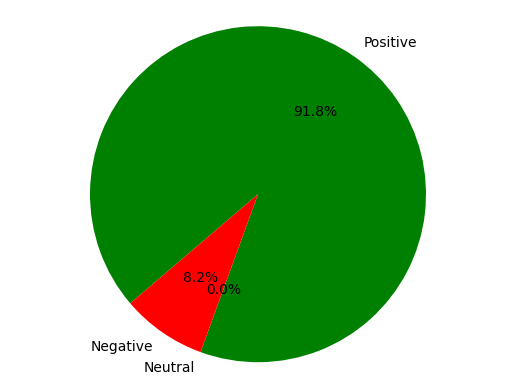

In [92]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'white']

# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', startangle=250)
plt.axis('equal')
plt.show()

In [97]:
print('Analysis Completed!')
print(str(positive) + " people have positive reviews")
print(str(negative) + ' people have negative reviews')
print(str(neutral) + ' people have neutral reviews')

Analysis Completed!
23805 people have positive reviews
2125 people have negative reviews
0 people have neutral reviews


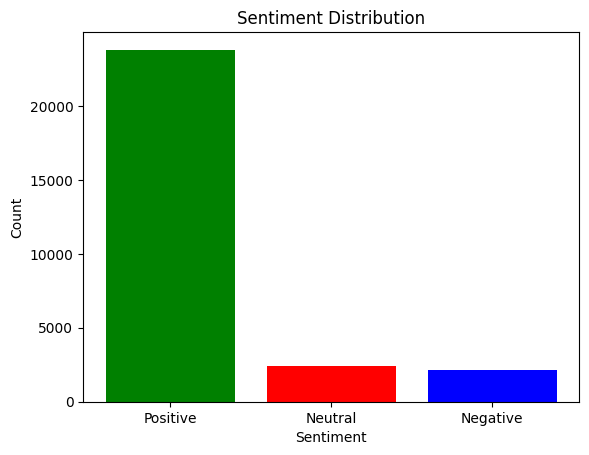

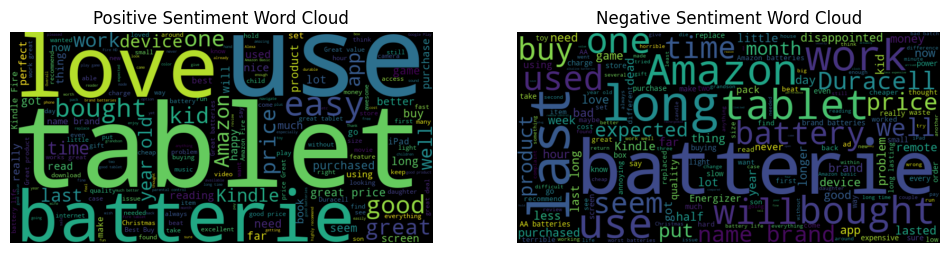

Sentiment Analysis:
Positive: 23805 reviews (84.02%)
Neutral: 2402 reviews (8.48%)
Negative: 2125 reviews (7.50%)

Top Positive Reviews:
Excellent
Great product!
A good bang for your buck!! Almost everything now a days uses batteries.
Great value!
AA batteries worked perfectly out of the box!

Top Negative Reviews:
Awful batteries don't work
Awful batteries.
terrible
these batteries explode - terrible quality
they are terrible

Average Polarity Score for Positive Reviews: 0.45
Average Polarity Score for Negative Reviews: -0.15

Analysis Completed!


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

dataset = pd.read_csv('Reviews.csv', header=None)
data = pd.DataFrame(dataset)
data = data.dropna()

def sentiment_calc(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return 'Positive', polarity
    elif polarity < 0:
        return 'Negative', polarity
    else:
        return 'Neutral', polarity

data['Sentiment'], data['Polarity'] = zip(*data[0].apply(sentiment_calc))

sentiment_counts = data['Sentiment'].value_counts()

sentiment_percentages = sentiment_counts / len(data) * 100

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

positive_text = ' '.join(data[data['Sentiment'] == 'Positive'][0])
negative_text = ' '.join(data[data['Sentiment'] == 'Negative'][0])

positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()

print('Sentiment Analysis:')
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} reviews ({sentiment_percentages[sentiment]:.2f}%)")

print('\nTop Positive Reviews:')
for review in data[data['Sentiment'] == 'Positive'].nlargest(5, 'Polarity')[0]:
    print(review)

print('\nTop Negative Reviews:')
for review in data[data['Sentiment'] == 'Negative'].nsmallest(5, 'Polarity')[0]:
    print(review)

positive_avg_polarity = data[data['Sentiment'] == 'Positive']['Polarity'].mean()
negative_avg_polarity = data[data['Sentiment'] == 'Negative']['Polarity'].mean()

print(f"\nAverage Polarity Score for Positive Reviews: {positive_avg_polarity:.2f}")
print(f"Average Polarity Score for Negative Reviews: {negative_avg_polarity:.2f}")

print('\nAnalysis Completed!')


In [167]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud

def generate_wordcloud(sentiment, df):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Preprocessed_data'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

def preprocess_data(data):
    return re.sub(r'[^a-zA-Z\s]', '', data)

def tokenize_data(preprocessed_data):
    return word_tokenize(preprocessed_data)

# Load the vectorizer and the Naive Bayes model
with open('Sentimeter\\vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('naive_bayes_model.pkl', 'rb') as f:
    clf = pickle.load(f)

def analyze_sentiment(csv_file_path):
    df = pd.read_csv(csv_file_path, header=None)

    df['Preprocessed_data'] = df[0].apply(preprocess_data)

    df['Tokens'] = df['Preprocessed_data'].apply(tokenize_data)

    X_bow = vectorizer.transform([' '.join(tokens) for tokens in df['Tokens']])

    df['Sentiment'] = clf.predict(X_bow)

    for sentiment in df['Sentiment'].unique():
        generate_wordcloud(sentiment, df)

    df['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    plt.pie(df['Sentiment'].value_counts(), labels=['Positive','Uncertain','Negative','Litigious'], colors=['red', 'green','blue','yellow'], autopct='%1.1f%%', startangle=90)

    # Calculate sentiment percentages
    sentiment_counts = df['Sentiment'].value_counts()
    total_reviews = len(df)
    sentiment_percentages = {sentiment: count / total_reviews * 100 for sentiment, count in sentiment_counts.items()}

    print("Sentiment Analysis Results:\n")
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment}: {count} reviews ({sentiment_percentages[sentiment]:.2f}%)")

    print('\nTop Reviews in Each Sentiment Category:')
    for sentiment in df['Sentiment'].unique():
        top_reviews = df[df['Sentiment'] == sentiment][0].head(5)
        print(f"\nTop {sentiment} Reviews:\n")
        for review in top_reviews:
            print(review)

    print("\nSentiment Distribution Pie Chart:")
    plt.show()

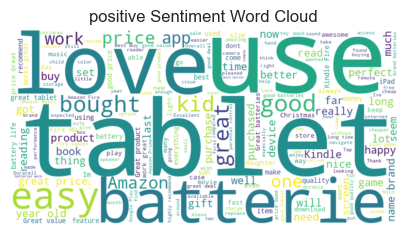

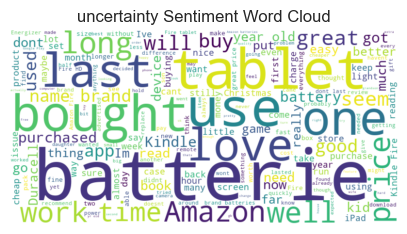

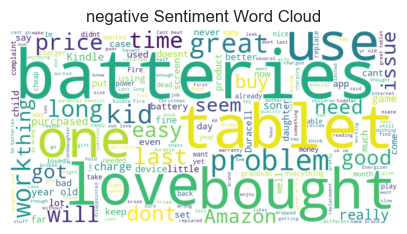

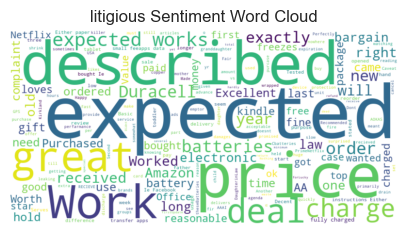

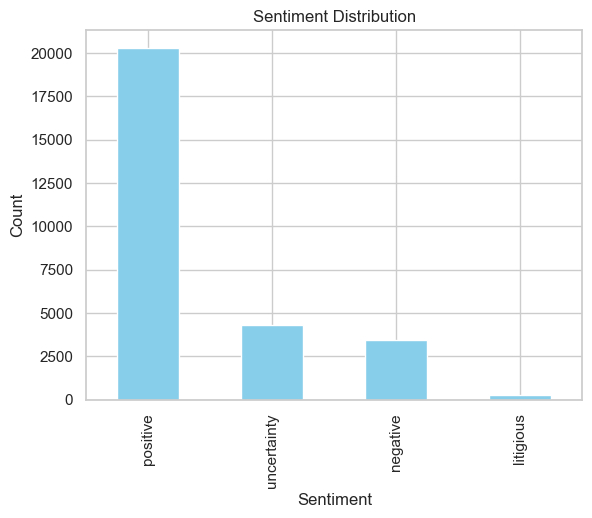

Sentiment Analysis Results:

positive: 20304 reviews (71.66%)
uncertainty: 4330 reviews (15.28%)
negative: 3436 reviews (12.13%)
litigious: 262 reviews (0.92%)

Top Reviews in Each Sentiment Category:

Top positive Reviews:

I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
Bulk is always the less expensive way to go for products like these
Well they are not Duracell but for the price i am happy.
These batteries are very long lasting the price is great.
Bought a lot of batteries for Christmas and the AmazonBasics Cell have been good. I haven't noticed a difference between the brand name batteries and the Amazon Basic brand. Just a lot easier to purchase and have arrive at the house and have on hand. Will buy again.

Top uncertainty Reviews:

Seem to work as well as name brand batteries at a much better price
When I first started getting the Amazon basic batteries I really liked them. With recent p

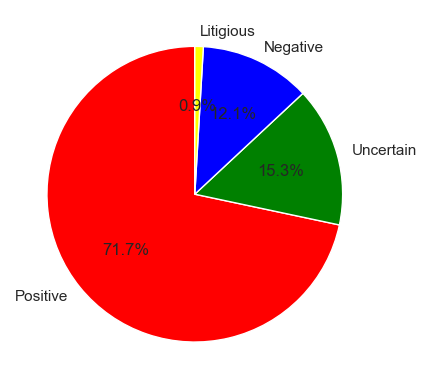

In [168]:
analyze_sentiment('Reviews.csv')